In [1]:
import numpy as np
from scipy.fft import dct,idct
import matplotlib.pyplot as plt
from PIL import Image

# Separating into 8x8 blocks

In [2]:
import numpy as np

image = Image.open("download.jpeg").convert('L')
image_array = np.array(image)
height, width = image_array.shape
pad_height = (8 - height % 8) % 8
pad_width = (8 - width % 8) % 8

# Pad the image with zeros
padded_image = np.pad(image_array, ((0, pad_height), (0, pad_width)), 'constant')

# Calculate the number of blocks in each dimension
num_blocks_h = padded_image.shape[0] // 8
num_blocks_w = padded_image.shape[1] // 8

blocks = np.empty((0, 8, 8))  # Initialize with the expected final shape


for i in range(num_blocks_h):
    for j in range(num_blocks_w):
        start_x = j*8
        end_x = start_x + 8
        start_y = i*8
        end_y = start_y+8
        block = padded_image[start_x:end_x,start_y:end_y]
        blocks = np.concatenate((blocks, [block]), axis=0)


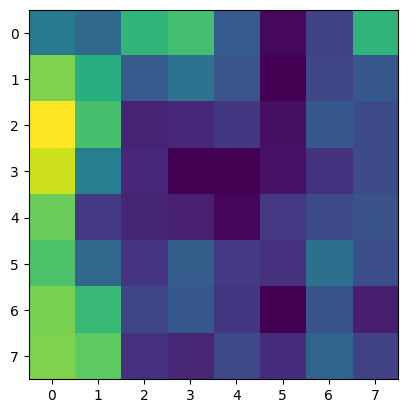

In [3]:
#displying a single block
plt.imshow(blocks[0])

In [9]:
print(blocks[0])

[[ 93.  77. 147. 156.  65.   5.  44. 146.]
 [180. 140.  64.  85.  59.   0.  47.  61.]
 [223. 158.  22.  26.  36.   9.  61.  50.]
 [206.  96.  26.   0.   0.  11.  33.  51.]
 [172.  38.  23.  20.   3.  38.  50.  57.]
 [161.  75.  34.  66.  38.  32.  82.  54.]
 [178. 150.  47.  61.  36.   0.  57.  19.]
 [180. 168.  32.  24.  49.  29.  72.  44.]]


reconstruct the image from blocks

In [10]:
reconstructed_image = np.zeros(padded_image.shape)

block_number = 0
for i in range(num_blocks_h):
    for j in range(num_blocks_w):
        start_x = j*8
        end_x = start_x + 8
        start_y = i*8
        end_y = start_y+8
        reconstructed_image[start_x:end_x,start_y:end_y] = blocks[block_number]
        block_number = block_number + 1

#Remove the padding


In [ ]:
plt.imshow(reconstructed_image,cmap="gray")

# Discrete cosine transform for macro blocks

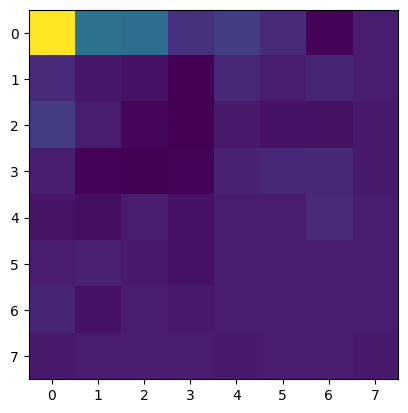

In [4]:
import numpy as np
from scipy.fft import dctn 

#perform DCT on blocks

dct_blocks = np.empty((0, 8,8))  # Initialize with the expected final shape

for index,block in enumerate(blocks):
    dct_image = dct(dct(block.astype(float), axis=0), axis=1)/2
    # dct_image = np.round(dct_image)
    dct_blocks = np.concatenate((dct_blocks, [dct_image]), axis=0)

#DCT of a single block
plt.imshow(dct_blocks[0])

In [12]:
print(dct_blocks[0])

[[ 8.93200000e+03  2.90571759e+03  2.76125981e+03  6.36536287e+02
   1.03520433e+03  4.76278506e+02 -6.50855004e+02  1.27231882e+00]
 [ 4.67513692e+02 -1.08291362e+02 -2.54831871e+02 -7.12565708e+02
   3.63503480e+02 -1.01597226e+00  2.62800786e+02  1.34703473e+01]
 [ 9.80439757e+02  5.27979236e+01 -5.68600072e+02 -7.30196883e+02
  -1.81605653e+01 -2.43350605e+02 -2.96835570e+02 -1.83090209e+01]
 [ 8.13682743e+01 -6.39528307e+02 -6.65401913e+02 -6.41659569e+02
   2.23343476e+02  3.92847121e+02  3.70869500e+02 -1.37828956e+01]
 [-2.20617316e+02 -3.78436431e+02 -1.20112345e+01 -2.51921645e+02
   2.20000000e+01 -6.20729468e+00  4.46591234e+02  2.17904219e+01]
 [ 3.07481842e+01  1.54454902e+02 -2.23660300e+01 -2.69735707e+02
   2.54059119e+00 -1.13841533e+01  6.77978641e+00  2.91238480e+00]
 [ 2.82718734e+02 -2.76074500e+02  1.11644302e+01 -1.47991372e+01
   3.19278365e+00  5.49040611e+00 -1.13999282e+01  5.98882195e+00]
 [-1.67541397e+01  2.88751950e+00  1.36589250e+01 -1.42471996e+00
  -

# Quantize

In [53]:
high_intensity_lum_matrix = np.array([[64, 44, 40, 64, 96, 160, 204, 244],
                                   [48, 48, 56, 76, 104, 232, 240, 220],
                                   [40, 52, 64, 96, 160, 228, 276, 224],
                                   [64, 76, 96, 140, 220, 256, 288, 256],
                                   [96, 104, 160, 204, 272, 328, 416, 484],
                                   [160, 232, 228, 256, 328, 416, 452, 396],
                                   [204, 240, 276, 288, 416, 452, 488, 408],
                                   [244, 220, 224, 256, 484, 396, 408, 320]])

mid_range_lum_matrix = np.array([[32, 22, 20, 32, 48, 80, 102, 122],
                               [24, 24, 28, 38, 52, 116, 120, 110],
                               [20, 26, 32, 48, 80, 114, 138, 112],
                               [32, 38, 48, 70, 110, 128, 144, 128],
                               [48, 52, 80, 102, 136, 164, 208, 242],
                               [80, 116, 114, 128, 164, 208, 226, 198],
                               [102, 120, 138, 144, 208, 226, 244, 204],
                               [122, 110, 112, 128, 242, 198, 204, 160]])


low_intensity_lum_matrix = np.array([[2, 1, 1, 2, 3, 5, 6, 7],
                                  [1, 1, 1, 2, 3, 7, 7, 6],
                                  [1, 1, 2, 3, 5, 7, 8, 6],
                                  [2, 2, 3, 4, 7, 8, 9, 7],
                                  [3, 3, 5, 7, 9, 10, 13, 14],
                                  [5, 7, 7, 8, 10, 13, 14, 12],
                                  [6, 7, 8, 9, 13, 14, 15, 13],
                                  [7, 6, 6, 7, 14, 12, 13, 8]])

high_quntized_blocks = np.empty((0, 8,8))  # Initialize with the expected final shape

for index,block in enumerate(dct_blocks):
    quntized = block/high_intensity_lum_matrix
    quntized = np.round(quntized)
    high_quntized_blocks = np.concatenate((high_quntized_blocks, [quntized]), axis=0)

mid_quntized_blocks = np.empty((0, 8,8))  # Initialize with the expected final shape

for index,block in enumerate(dct_blocks):
    quntized = block/mid_range_lum_matrix
    quntized = np.round(quntized)
    mid_quntized_blocks = np.concatenate((mid_quntized_blocks, [quntized]), axis=0)

low_quntized_blocks = np.empty((0, 8,8))  # Initialize with the expected final shape

for index,block in enumerate(dct_blocks):
    quntized = (block/low_intensity_lum_matrix).astype(int)
    # quntized = np.round(quntized)
    quntized = quntized
    low_quntized_blocks = np.concatenate((low_quntized_blocks, [quntized]), axis=0)
    
low_quntized_blocks = low_quntized_blocks.astype(int)
mid_quntized_blocks = mid_quntized_blocks.astype(int)
high_quntized_blocks = high_quntized_blocks.astype(int)



In [56]:
print(low_quntized_blocks[0])

[[4466 2905 2761  318  345   95 -108    0]
 [ 467 -108 -254 -356  121    0   37    2]
 [ 980   52 -284 -243   -3  -34  -37   -3]
 [  40 -319 -221 -160   31   49   41   -1]
 [ -73 -126   -2  -35    2    0   34    1]
 [   6   22   -3  -33    0    0    0    0]
 [  47  -39    1   -1    0    0    0    0]
 [  -2    0    2    0   -1    0    1   -2]]


# Huffman coding (entropy coding)

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

class TreeNode:
    #This class defines a node object in the huffman tree
    def __init__(self,data,probability,left=None, right=None):
        self.data = data
        self.probability = probability
        self.children = []
        self.parent = None
        self.bit = None
        self.bit_sequence = False
        self.left = left
        self.right = right

    def add_child(self,child):
        child.parent = self
        self.children.append(child)

    def assign_bits(self):
        
        if self.children:
            self.children[0].bit = "1"
            self.children[1].bit = "0"
            for i in self.children:
                i.assign_bits()
                
    def assign_bit_sequence(self):
        if not self.parent:
            for i in self.children:
                    i.assign_bit_sequence()
        if self.parent:
            self.bit_sequence = self.parent.bit_sequence + self.bit
            if self.children:
                for i in self.children:
                        i.assign_bit_sequence()
            else:
                self.bit_sequence = self.bit_sequence[1:]

    def get_leaf_values(self):

        if not self.children:
            #a leaf node
            return self.data,self.bit_sequence

        left_values = self.children[0].get_leaf_values()
        right_values = self.children[1].get_leaf_values()
        self.children[0].get_leaf_values()
        self.children[1].get_leaf_values()

        return left_values,right_values

def build_tree(codebook):
    root = TreeNode(None,None)

    for symbol, code in codebook.items():
        node = root

        for bit in code:
            if bit == "0":
                if node.left is None:
                    node.left = TreeNode(None,None)
                node = node.left
            else:
                if node.right is None:
                    node.right = TreeNode(None,None)
                node = node.right

        node.data = symbol

    return root

def huffman_decoding_tree(bit_sequence, root):
    decoded_values = []
    current_node = root
    
    for bit in bit_sequence:
        if bit == "0":
            current_node = current_node.left
        else:
            current_node = current_node.right
        if current_node.data is not None:
            decoded_values.append(current_node.data)
            current_node = root

    return decoded_values

def quantinze(number,cropped):

    image = cropped
    #quantice a number
    number_of_ranges = 7
    max_ = np.max(image)
    min_ = np.min(image)
    range_ = max_ - min_
    range_length = math.ceil(range_/number_of_ranges)
    updated_range = range_length*number_of_ranges
    value_to_add_for_range = updated_range - range_
    if (max_+ number_of_ranges) <= 255:
        max_ = max_ + value_to_add_for_range
    else:
        min_ = min_ - value_to_add_for_range
    quantized = None
    #find in which range the number is in
    #assign the quantized value 
    middle = min_ + (math.ceil((number-min_)/range_length)-1)*range_length + range_length/2 #middle value of the range it belongs
    if number<min_:
        quantized = min_
    elif number > max_:
        quantized = max_
    elif number < middle:
        quantized = min_ + (math.ceil((number-min_)/range_length)-1)*range_length
    else:
        quantized = min_ + (math.ceil((number-min_)/range_length))*range_length
    return quantized

def quantize_image(image,reference):
    uniques = np.unique(image)
    new_arr = image
    for i in uniques:
        quantized_value = quantinze(i,reference)

        new_arr = np.where(new_arr == i, quantized_value, new_arr)
    return new_arr

def flatten_tuple(nested_tuple):
    flattened_list = []
    for element in nested_tuple:
        if isinstance(element, tuple):
            flattened_list.extend(flatten_tuple(element))
        else:
            flattened_list.append(element)
    tuples_list = []
    return flattened_list

def build_huffman_tree_from_leaves(leaves_):
    #creating leaf nodes for each symbol
    sorted_leaves = sorted(leaves_, key=lambda node: node.probability, reverse=True)
    # #now itteratively create the tree
    count = 1
    while len(sorted_leaves)>1:
        new_node_probability = sorted_leaves[-1].probability + sorted_leaves[-2].probability
        new_node = TreeNode(data= f"inter_{count}",probability=new_node_probability)
        new_node.add_child(sorted_leaves[-2])
        new_node.add_child(sorted_leaves[-1]) # does this order matter
        sorted_leaves = sorted_leaves[:-2]
        sorted_leaves.append(new_node)
        sorted_leaves = sorted(sorted_leaves, key=lambda node: node.probability, reverse=True)
        count = count + 1
    sorted_leaves[-1].bit_sequence = "X" 
    sorted_leaves[-1].assign_bits()
    sorted_leaves[-1].assign_bit_sequence()
    # sorted_leaves[-1].print_tree()
    flattened_list = flatten_tuple(sorted_leaves[-1].get_leaf_values())
    tuple_list = []
    for i in range(0, len(flattened_list), 2):
        tuple_list.append((flattened_list[i], flattened_list[i + 1]))
    flattened_list = tuple_list
    
    # print(flattened_list)
    return flattened_list

def generate_huffman_code(uniques,probabilities):

    symbols_objects = []
    for data,probabiliy in zip(uniques.tolist(),probabilities):
        leaf = TreeNode(str(data),probabiliy)
        symbols_objects.append(leaf)

    codes = build_huffman_tree_from_leaves(symbols_objects)
    result = {}

    for item in codes:
        result[item[0]] = item[1]

    return result

def compress_image(huffman_code_for_cropped,image):
    #this image should be quantized using the range in the cropped image rgb channel
    array_to_compress = image.flatten()
    bit_sequence = ""
    for i in array_to_compress:
        symbol = huffman_code_for_cropped[str(i)]
        bit_sequence = bit_sequence + symbol

    return bit_sequence

def save_string_to_file(string, filename):
    #saves a given string to a text file as the given file name
    with open(filename, 'w') as f:
        f.write(string)

def get_entropy(image):
    uniques,counts = np.unique(image,return_counts = True)
    probabilities = counts/np.sum(counts)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def psnr(image1, image2):   
# Convert the images to grayscale
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculate the mean squared error (MSE)
    mse = np.mean((image1 - image2) ** 2)

    # Check if the MSE is zero
    if mse == 0:
        return float('inf')

     # Calculate the PSNR
    psnr = 10 * np.log10(255 ** 2 / mse)
    return psnr

def average_length(image,result):
    uniques,counts = np.unique(image,return_counts = True)
    probabilities = counts/np.sum(counts)
    average_length = 0
    for unique,prob in zip(uniques,probabilities):
        code_length = len(result[str(unique)])
        average_length = average_length + code_length*prob
    return average_length


In [91]:
uniques_low,counts_low = np.unique(low_quntized_blocks[1],return_counts = True)
probabilities_low = counts_low/np.sum(counts_low)

In [92]:
print(len(uniques_low))

24


In [93]:
huffman_code_low = generate_huffman_code(uniques_low,probabilities_low)

In [94]:
print(huffman_code_low)

{'0': '1', '-188': '011111', '-134': '011110', '-244': '011101', '-200': '011100', '-39': '011011', '-31': '011010', '-69': '011001', '-58': '011000', '1120': '010111', '11146': '010110', '711': '010101', '814': '010100', '-1541': '010011', '-677': '010010', '-2851': '01000', '49': '00111', '307': '00110', '-1': '00101', '34': '00100', '361': '00011', '387': '00010', '319': '00001', '321': '00000'}


In [96]:
bit_sequence_low = compress_image(huffman_code_low,low_quntized_blocks[1])

In [97]:
print(len(bit_sequence_low))

170


In [98]:
# Build the Huffman trie
tree = build_tree(huffman_code_low)

In [99]:
decoded_values = np.array(huffman_decoding_tree(bit_sequence_low, tree))
decoded_image = np.reshape(decoded_values,(8,8)).astype(int)

In [100]:
print(decoded_image)

[[11146   814  -134   711  -244    49     0     0]
 [-2851  1120   319   307  -200     0     0     0]
 [-1541   387   361     0   -69     0     0     0]
 [ -677    -1   321   -31     0     0     0   -39]
 [ -188     0    34     0     0     0     0     0]
 [  -58     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


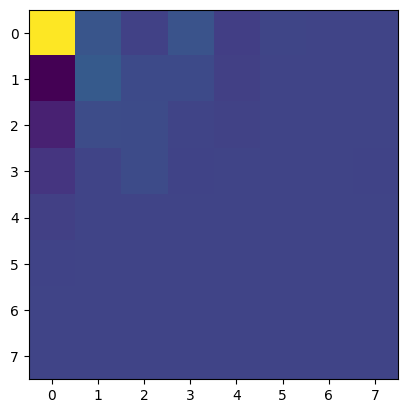

In [101]:
plt.imshow(decoded_image)

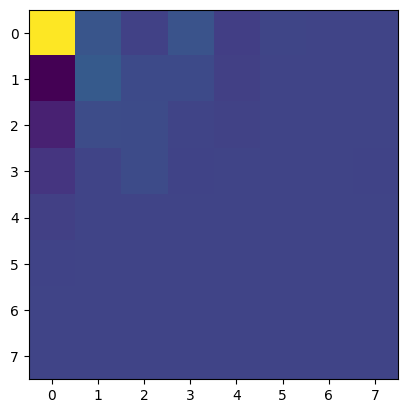

In [102]:
plt.imshow(low_quntized_blocks[1])

In [71]:
result_string = ''
huffman_codes_list = []
for index,block in enumerate(low_quntized_blocks):
    uniques_low,counts_low = np.unique(block,return_counts = True)
    probabilities_low = counts_low/np.sum(counts_low)
    huffman_code_low = generate_huffman_code(uniques_low,probabilities_low)
    huffman_codes_list.append(huffman_code_low)
    bit_sequence_low = compress_image(huffman_code_low,block)
    result_string = result_string + str(bit_sequence_low) + "\n"
    #concatanate to a string
    

In [72]:
with open("result.txt", 'w') as f:
        f.write(result_string)

# Decoding the blocks

In [82]:
# Load the text file
with open('result.txt', 'r') as file:
    text_string = file.read().strip()

block_strings = text_string.split("\n")

In [83]:
print(len(block_strings))

361


In [88]:
result_blocks = np.empty((0, 8,8))

for index,string in enumerate(block_strings):
    tree = build_tree(huffman_codes_list[index])
    decoded_values = np.array(huffman_decoding_tree(string, tree))
    decoded_image = np.reshape(decoded_values,(8,8)).astype(int)
    result_blocks = np.concatenate((result_blocks, [decoded_image]), axis=0)
result_blocks = result_blocks.astype(int)

In [103]:
print(result_blocks[1])

[[11146   814  -134   711  -244    49     0     0]
 [-2851  1120   319   307  -200     0     0     0]
 [-1541   387   361     0   -69     0     0     0]
 [ -677    -1   321   -31     0     0     0   -39]
 [ -188     0    34     0     0     0     0     0]
 [  -58     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     0     0]]


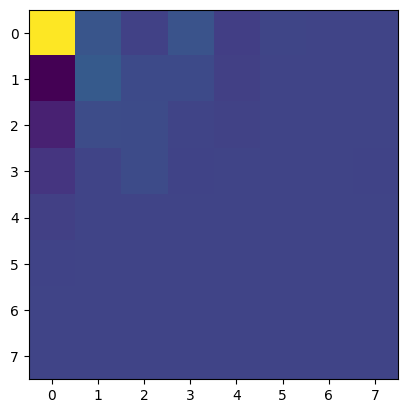

In [104]:
plt.imshow(result_blocks[1])

# Reconstructing the decoded blocks

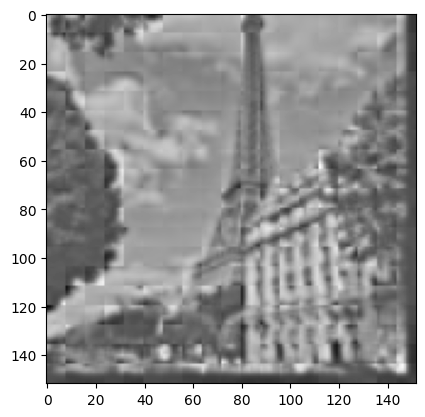

In [106]:
idct_blocks_low = np.empty((0, 8,8))  # Initialize with the expected final shape

for index,block in enumerate(result_blocks):
    idct_image = idct(idct(block, axis=1), axis=0)
    idct_blocks_low = np.concatenate((idct_blocks_low, [idct_image]), axis=0)

reconstructed_low = np.zeros(padded_image.shape)

block_number = 0
for i in range(num_blocks_h):
    for j in range(num_blocks_w):
        start_x = j*8
        end_x = start_x + 8
        start_y = i*8
        end_y = start_y+8
        reconstructed_low[start_x:end_x,start_y:end_y] = idct_blocks_low[block_number]
        block_number = block_number + 1
plt.imshow(reconstructed_low,cmap='gray')